## Check Installations

In [3]:
import sys, platform
import numpy as np, pandas as pd, matplotlib.pyplot as plt

print("Python:", sys.version)
print("Platform:", platform.platform())
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

Python: 3.9.6 (default, Oct 18 2022, 12:41:40) 
[Clang 14.0.0 (clang-1400.0.29.202)]
Platform: macOS-12.7.6-x86_64-i386-64bit
pandas: 2.3.2
numpy: 2.0.2


## Import data from Kagglehub

In [4]:
from pathlib import Path
import pandas as pd

# choose a stable local filename
LOCAL_CSV = Path("data/raw/pump_sensor_v1.csv")
LOCAL_PARQUET = Path("data/raw/pump_sensor_v1.parquet")

def load_pump_data_cached():
    # 1) Prefer local Parquet (fast), then CSV
    if LOCAL_PARQUET.exists():
        print(f"Loading local Parquet: {LOCAL_PARQUET}")
        return pd.read_parquet(LOCAL_PARQUET)
    if LOCAL_CSV.exists():
        print(f"Loading local CSV: {LOCAL_CSV}")
        return pd.read_csv(LOCAL_CSV)
    
    # 2) If not found locally, fetch once from Kaggle, then save
    print("Local copy not found. Fetching from KaggleHub…")
    import kagglehub
    from kagglehub import KaggleDatasetAdapter

    # Optionally list files to confirm the name
    # files = kagglehub.list_dataset_files("nphantawee/pump-sensor-data")
    # print(files)

    file_path = "sensor.csv"  # change if your dataset uses a different file
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "nphantawee/pump-sensor-data",
        file_path,
    )

    # Save locally (both formats are handy)
    LOCAL_CSV.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(LOCAL_CSV, index=False)
    try:
        df.to_parquet(LOCAL_PARQUET, index=False)  # needs pyarrow
    except Exception as e:
        print(f"(Parquet save skipped: {e})")

    print(f"Saved local copies: {LOCAL_CSV} {LOCAL_PARQUET if LOCAL_PARQUET.exists() else ''}")
    return df

df = load_pump_data_cached()
df.head()


Loading local Parquet: data/raw/pump_sensor_v1.parquet


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## Check sample data for shape, columns and missing values

In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.sample(5)



Shape: (220320, 55)
Columns: ['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status']


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
86959,86959,2018-05-31 09:19:00,2.459491,49.218750,53.99305,44.010414,626.851800,72.801930,13.68634,16.07350,...,50.781250,41.956020,48.321760,52.662040,43.40278,149.30560,54.108800,232.060200,203.125000,NORMAL
61700,61700,2018-05-13 20:20:00,2.508681,49.739580,53.99305,45.312500,634.490700,76.349600,13.38252,15.74797,...,44.791660,39.641200,38.773150,40.509258,40.79861,153.93520,55.266200,185.474500,157.696800,NORMAL
177951,177951,2018-08-02 13:51:00,2.492940,47.265625,51.69271,46.831600,637.268555,70.819940,14.53993,16.65220,...,47.135410,41.666670,43.692131,49.768520,47.74306,187.78940,54.687500,NaN,203.993100,NORMAL
166166,166166,2018-07-25 09:26:00,2.485070,44.921875,52.51736,44.097221,618.981445,71.380820,14.25781,16.12413,...,57.291660,37.615740,37.905090,48.032410,40.21991,96.06481,49.479170,NaN,184.317100,NORMAL
134427,134427,2018-07-03 08:27:00,NaN,32.725693,33.59375,32.508678,3.451967,99.999878,NaN,NaN,...,26.041666,27.777779,27.488426,27.777779,28.93518,27.77778,27.777779,28.067129,28.067129,RECOVERING


### check missing value and get the sum of from each sensor and so 10 records out of it

In [6]:
df.isna().sum().head(10)

Unnamed: 0        0
timestamp         0
sensor_00     10208
sensor_01       369
sensor_02        19
sensor_03        19
sensor_04        19
sensor_05        19
sensor_06      4798
sensor_07      5451
dtype: int64

## Visualization for checking sesnsor behaviour on df

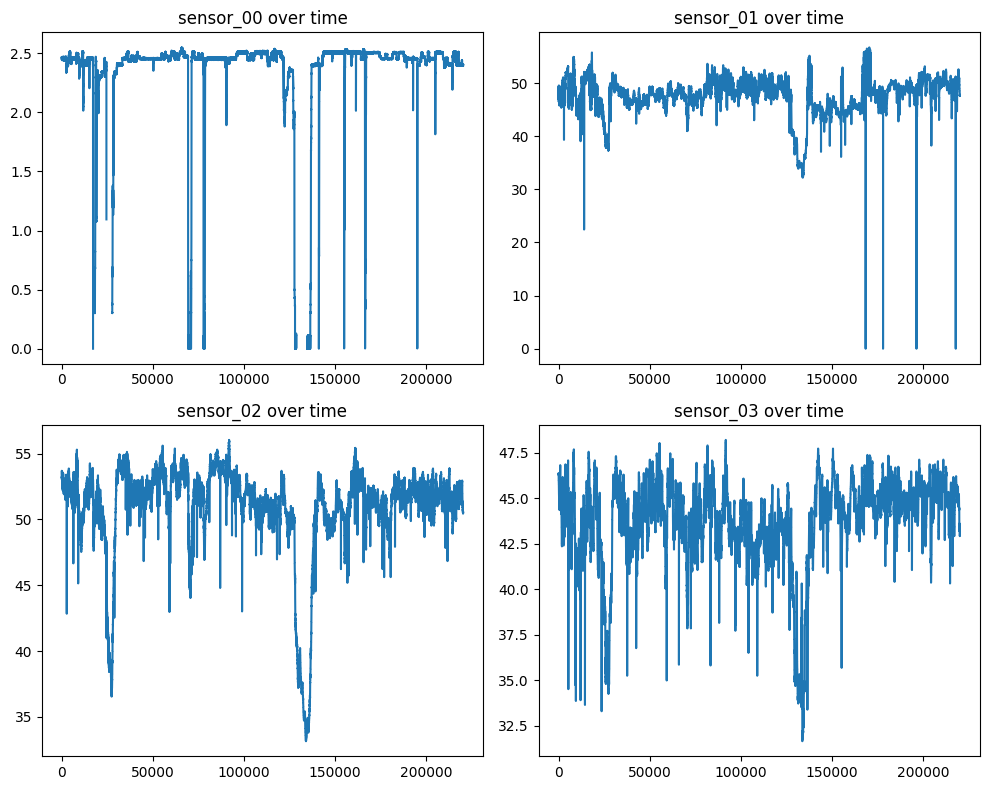

In [7]:
num_cols = df.select_dtypes(include="number").columns
x = np.arange(len(df))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))


axes[0, 0].plot(x, df[num_cols[1]].values)
axes[0, 0].set_title(f"{num_cols[1]} over time")


axes[0, 1].plot(x, df[num_cols[2]].values)
axes[0, 1].set_title(f"{num_cols[2]} over time")


axes[1, 0].plot(x, df[num_cols[3]].values)
axes[1, 0].set_title(f"{num_cols[3]} over time")


axes[1, 1].plot(x, df[num_cols[4]].values)
axes[1, 1].set_title(f"{num_cols[4]} over time")

plt.tight_layout()
plt.show()




## Check machine status/failure column:  Identify the number of broken, Recovering and Normal rows

In [8]:
status_cols = [c for c in df.columns if "status" in c.lower()]
if status_cols:
    print("Status column found:", status_cols[0])
    print(df[status_cols[0]].value_counts())
else:
    print("No explicit status column found.")


Status column found: machine_status
machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


In [9]:
print(df.nunique())

Unnamed: 0        220320
timestamp         220320
sensor_00           1253
sensor_01            831
sensor_02            831
sensor_03            588
sensor_04           7844
sensor_05         190751
sensor_06            812
sensor_07            531
sensor_08            626
sensor_09            565
sensor_10         198804
sensor_11         196368
sensor_12         187145
sensor_13         191983
sensor_14          94564
sensor_15              0
sensor_16         110522
sensor_17         148000
sensor_18         152603
sensor_19         100422
sensor_20          92129
sensor_21         131083
sensor_22         126401
sensor_23         119286
sensor_24         133778
sensor_25         165999
sensor_26         179718
sensor_27         203198
sensor_28         189278
sensor_29         201908
sensor_30           2070
sensor_31           2685
sensor_32         205414
sensor_33         200855
sensor_34         203895
sensor_35         201781
sensor_36         201437
sensor_37         188898


## Clening Dataset

### Dropping column 0 and sensor_15 data as column 0 is serial numbers and sensor_15 is all null value

In [10]:
df = df.drop(columns=["Unnamed: 0", "sensor_15"], errors="ignore")

## Handling Missing value using forward fill and using median full for leftover gaps.

In [11]:
df = df.fillna(method="ffill")  
df = df.fillna(df.median(numeric_only=True))  
print(df.isna().sum().sum())

/var/folders/k1/1h7ndcbd6_bgc2gbsr0msz1c0000gn/T/ipykernel_35562/1300871130.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


0


## Generating Remaining Useful Life.(RUL)

### creating new column RUL which counts down from the lastworking cycle -> 0 at failure
#### Example: If a pump breaks at 1000th cycle, then at cycle 950 → RUL=50, at cycle 999 → RUL=1, at 1000 → RUL=0.
#### counting backward to indentify the failure

In [12]:
df["RUL"] = np.nan
failure_indices = df.index[df["machine_status"] == "BROKEN"]

for fail_idx in failure_indices:
    counter = 0
    i = fail_idx
    while i >= 0 and df.loc[i, "machine_status"] != "BROKEN":
        df.loc[i, "RUL"] = counter
        counter += 1
        i -= 1
    df.loc[fail_idx, "RUL"] = 0


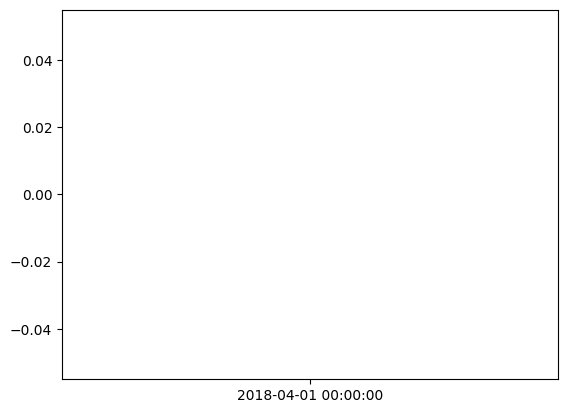

In [13]:
plt.plot(df["timestamp"][:2000], df["RUL"][:2000])

In [14]:
print(df["machine_status"].unique())
print(df["machine_status"].value_counts())


['NORMAL' 'BROKEN' 'RECOVERING']
machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


In [15]:
import numpy as np

# Initialize RUL with big number
df["RUL"] = np.inf

# Get all failure points
failures = df.index[df["machine_status"] == "BROKEN"]

# For each row, find how far until next BROKEN
for i in range(len(df)):
    next_failures = failures[failures > i]
    if len(next_failures) > 0:
        df.loc[i, "RUL"] = next_failures[0] - i
    else:
        df.loc[i, "RUL"] = np.nan  # no more failures after this point


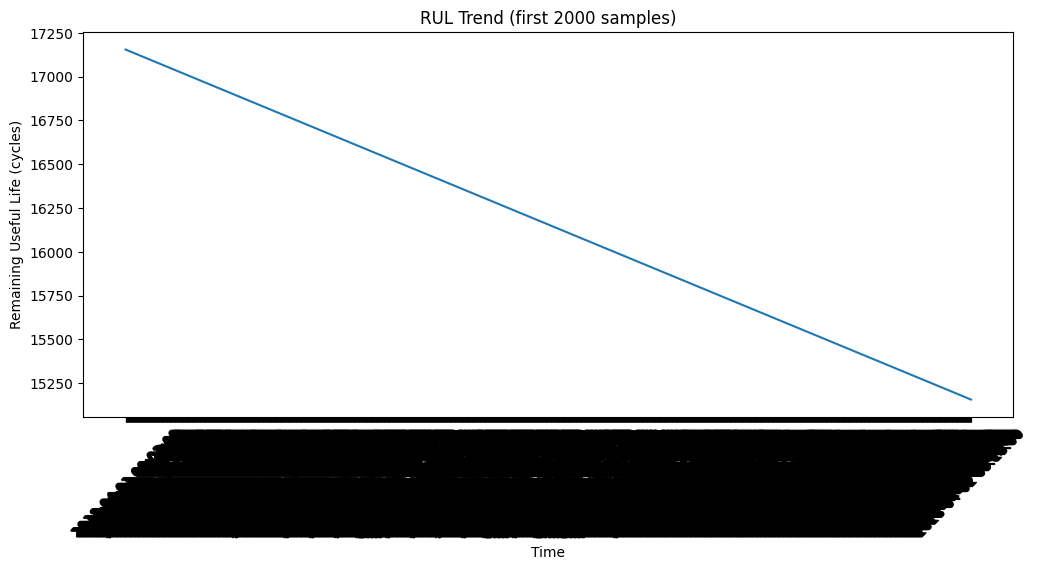

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df["timestamp"][:2000], df["RUL"][:2000])
plt.xticks(rotation=45)
plt.title("RUL Trend (first 2000 samples)")
plt.ylabel("Remaining Useful Life (cycles)")
plt.xlabel("Time")
plt.show()


#### In first 2K sample did not find failure it may be far so printitng failure occurance

In [17]:
failure_indices = df.index[df["machine_status"] == "BROKEN"]
print("First 10 failure rows:", failure_indices[:10])


First 10 failure rows: Index([17155, 24510, 69318, 77790, 128040, 141131, 166440], dtype='int64')


##### Zooming neaar a failure event

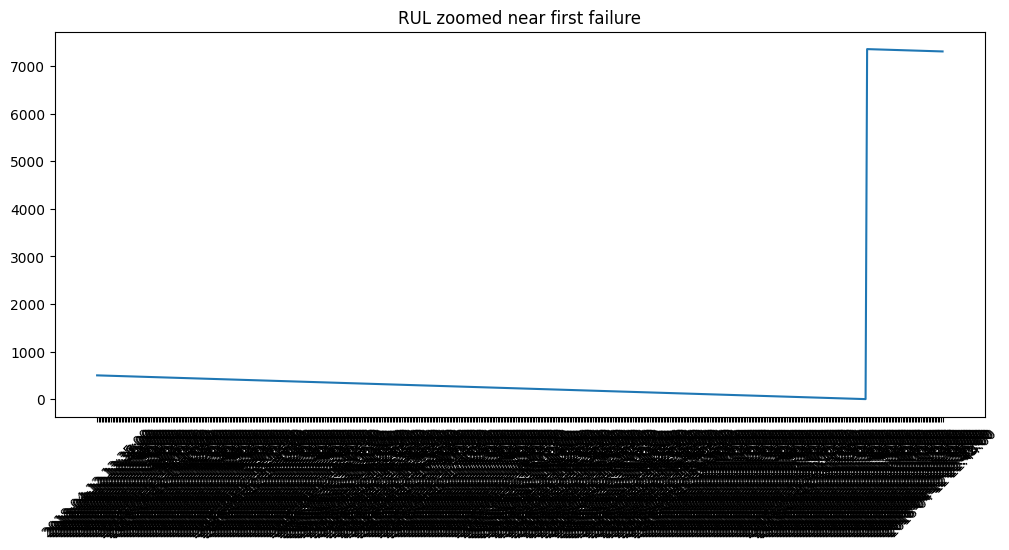

In [18]:
idx = failure_indices[0]  # first failure
window = 500  # look 500 steps before failure
subset = df.iloc[idx-window:idx+50]

plt.figure(figsize=(12,5))
plt.plot(subset["timestamp"], subset["RUL"])
plt.xticks(rotation=45)
plt.title("RUL zoomed near first failure")
plt.show()



In [19]:
df.loc[idx, ["timestamp","machine_status","RUL"]]


timestamp         2018-04-12 21:55:00
machine_status                 BROKEN
RUL                            7355.0
Name: 17155, dtype: object

Convert this time-series into training samples (sliding windows),

Train a first baseline ML model (Random Forest),

Evaluate how well it predicts RUL.

### keep raw/processed data, models, and notebooks

In [20]:
import os, pathlib

# change this if your paths are different
BASE = pathlib.Path(".")
DATA_RAW = BASE / "data" / "raw"
DATA_PROCESSED = BASE / "data" / "processed"
MODELS = BASE / "models"

for p in [DATA_RAW, DATA_PROCESSED, MODELS]:
    p.mkdir(parents=True, exist_ok=True)

print("Folders ready:", DATA_RAW, DATA_PROCESSED, MODELS)


Folders ready: data/raw data/processed models


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

### Read the data and parse timestamps for plotting/splitting.

In [22]:
csv_path = "data/raw/pump_sensor_v1.csv"

df = pd.read_csv(csv_path)
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

print("Data loaded:", df.shape)
df.head()    

Data loaded: (220320, 55)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### Data cleaning

In [23]:
# drop index-like column created by CSV export (if present)
for index_column in ["Unnamed: 0", "index"]:
    if index_column in df.columns:
        df = df.drop(columns=[index_column])

# drop fully-empty sensor if present (we saw sensor_15 was all-NaN)
if "sensor_15" in df.columns and df["sensor_15"].isna().all():
    df = df.drop(columns=["sensor_15"])

# normalize machine_status text (NORMAL/BROKEN/RECOVERING etc.)
df["machine_status"] = (
    df["machine_status"].astype(str).str.strip().str.upper()
)

print("Columns:", len(df.columns))
print(df["machine_status"].value_counts())


Columns: 53
machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


### Forward fill mimics “hold last sensor value”, median fill is a robust fallback.

In [24]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

# forward-fill numeric gaps
df[num_cols] = df[num_cols].fillna(method="ffill")
# fill any leftovers with medians
df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

print("Total remaining NaNs:", df.isna().sum().sum())



/var/folders/k1/1h7ndcbd6_bgc2gbsr0msz1c0000gn/T/ipykernel_35562/2923745267.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[num_cols] = df[num_cols].fillna(method="ffill")


Total remaining NaNs: 0


## Compute RUL = steps until the next failure
### we want “how many steps remain before the next BROKEN”. We do this in a vectorized way which is fast.

In [25]:
N = len(df)
print ("Total rows:", N)
idx = np.arange(N)

# Identify the failures
failure_idx = np.where(df["machine_status"].values == "BROKEN")[0]
if failure_idx.size == 0:
    raise ValueError("No BROKEN rows found; cannot compute RUL.")

# for each row i, find the first failure index >= i
pos = np.searchsorted(failure_idx, idx, side="left")

# next failure index for each row (NaN if none after)
next_fail = np.full(N, np.nan, dtype="float64")
valid = pos < failure_idx.size
next_fail[valid] = failure_idx[pos[valid]]

# RUL = distance to next failure; 0 exactly at failures
df["RUL"] = next_fail - idx
df.loc[df["machine_status"] == "BROKEN", "RUL"] = 0.0

# clip very large RUL (stabilizes training)
MAX_RUL = 2000
df["RUL_clipped"] = df["RUL"].clip(upper=MAX_RUL)

# sanity peek near the first failure
first_fail = int(failure_idx[0])
df.loc[first_fail-5:first_fail+2, ["timestamp","machine_status","RUL","RUL_clipped"]]


Total rows: 220320


,timestamp,machine_status,RUL,RUL_clipped
17150,2018-04-12 21:50:00,NORMAL,5.0,5.0
17151,2018-04-12 21:51:00,NORMAL,4.0,4.0
17152,2018-04-12 21:52:00,NORMAL,3.0,3.0
17153,2018-04-12 21:53:00,NORMAL,2.0,2.0
17154,2018-04-12 21:54:00,NORMAL,1.0,1.0
17155,2018-04-12 21:55:00,BROKEN,0.0,0.0
17156,2018-04-12 21:56:00,RECOVERING,7354.0,2000.0
17157,2018-04-12 21:57:00,RECOVERING,7353.0,2000.0


### Plot to see first failure to check it is hitting zero

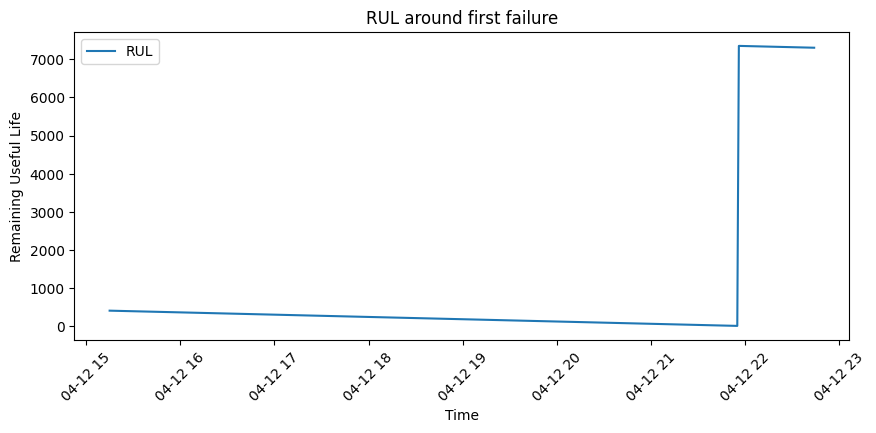

In [26]:
window = 400  # look 400 rows before the first failure
start = max(0, first_fail - window)
subset = df.iloc[start:first_fail+50]

plt.figure(figsize=(10,4))
plt.plot(subset["timestamp"], subset["RUL"], label="RUL")
plt.xticks(rotation=45)
plt.title("RUL around first failure")
plt.ylabel("Remaining Useful Life")
plt.xlabel("Time")
plt.legend()
plt.show()


## sensor columns & define window features
### We turn the last WINDOW rows into summary features per sensor (mean/std/min/max/last/slope)


In [27]:
sensor_cols = [c for c in df.columns if c.startswith("sensor_") and c in df.columns and c in num_cols]
len(sensor_cols), sensor_cols[:8]

(51,
 ['sensor_00',
  'sensor_01',
  'sensor_02',
  'sensor_03',
  'sensor_04',
  'sensor_05',
  'sensor_06',
  'sensor_07'])

In [28]:
def window_features(arr: np.ndarray) -> np.ndarray:
    """
    arr: shape (W, S) where W=window length, S=#sensors
    returns: 1D feature vector concatenating per-sensor stats:
             mean, std, min, max, last, slope
    """
    # basic stats along time axis
    mean_ = np.mean(arr, axis=0)
    std_  = np.std(arr, axis=0, ddof=0)
    min_  = np.min(arr, axis=0)
    max_  = np.max(arr, axis=0)
    last_ = arr[-1, :]

    # slope per sensor via simple least-squares
    W = arr.shape[0]
    x = np.arange(W)
    x_mean = x.mean()
    denom = np.sum((x - x_mean) ** 2) if W > 1 else 1.0
    y_centered = arr - arr.mean(axis=0, keepdims=True)
    slope_ = (y_centered * (x - x_mean)[:, None]).sum(axis=0) / denom

    return np.concatenate([mean_, std_, min_, max_, last_, slope_], axis=0)


## Build windowed dataset (X, y)
- **WINDOW** → How many past rows per sample  
- **STEP** → Hop size; overlap is OK (helps the model see more situations)  
- We drop samples whose label would be **NaN** (after the last failure there’s no “next failure”).  


In [29]:
WINDOW = 60      # ~last 60 minutes if data is minutely
STEP   = 30      # 50% overlap
MAX_RUL = 2000   # already used above

X_list, y_list, end_idx = [], [], []

# only build windows where the label exists (before the last failure)
last_labelable = np.where(~np.isnan(df["RUL"].values))[0][-1]

for start in range(0, last_labelable - WINDOW + 1, STEP):
    end = start + WINDOW
    arr = df.loc[start:end-1, sensor_cols].values.astype("float32", copy=False)
    feats = window_features(arr)
    label = float(min(df.loc[end-1, "RUL"], MAX_RUL))
    X_list.append(feats)
    y_list.append(label)
    end_idx.append(end-1)

X = np.vstack(X_list).astype("float32")
y = np.asarray(y_list, dtype="float32")
end_idx = np.asarray(end_idx, dtype="int32")

print("X shape:", X.shape)  # (samples, features)
print("y shape:", y.shape)  # (samples,)


X shape: (5547, 306)
y shape: (5547,)


## Time-based train/test split
### predictive models must be tested on future data, not randomly shuffled past+future.

In [30]:
split_point = int(np.quantile(end_idx, 0.8))  # 80th percentile of window end rows
train_mask = end_idx < split_point
test_mask  = ~train_mask

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]

print("Train windows:", X_train.shape[0])
print("Test windows:",  X_test.shape[0])



Train windows: 4437
Test windows: 1110


## Train a Random Forest baseline
### good first model for tabular features; handles non-linearities; minimal tuning.

In [31]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE:  230.11
RMSE: 427.86


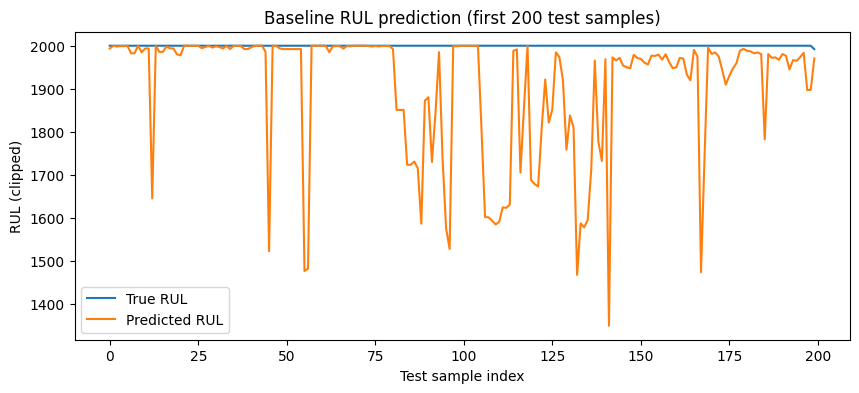

In [32]:
plt.figure(figsize=(10,4))
n = min(200, len(y_test))
plt.plot(y_test[:n], label="True RUL")
plt.plot(y_pred[:n], label="Predicted RUL")
plt.title("Baseline RUL prediction (first 200 test samples)")
plt.xlabel("Test sample index")
plt.ylabel("RUL (clipped)")
plt.legend()
plt.show()




## Save the model

In [33]:
model_path = MODELS / "rf_rul_model.joblib"
joblib.dump(rf, model_path)
print("Saved model to:", model_path)


Saved model to: models/rf_rul_model.joblib


## Make a live prediction from the latest data

### simulate production — “given the last WINDOW readings right now, what’s the RUL?”

In [34]:
def predict_live_rul(df, model, sensor_cols, window=60):
    arr = df.loc[len(df)-window:len(df)-1, sensor_cols].values.astype("float32", copy=False)
    feats = window_features(arr).reshape(1, -1)
    pred = float(model.predict(feats)[0])
    return max(0.0, pred)

live_rul = predict_live_rul(df, rf, sensor_cols, window=WINDOW)
print(f"Predicted RUL *right now*: {live_rul:.1f} cycles")


Predicted RUL *right now*: 1283.6 cycles


## Data and define helper choices
### keeoing all parameter in one place to make it reproducible

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# --- parameters you can tweak ---
WINDOW = 60     # past rows per sample (try 30/60/120)
STEP   = 30     # hop size between windows
MAX_RUL = 2000  # keep target bounded

# assume df is already loaded, cleaned, and has RUL from Day 2–3
assert "RUL" in df.columns

# numeric sensor columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
sensor_cols = [c for c in df.columns if c.startswith("sensor_") and c in num_cols]
print("Using", len(sensor_cols), "sensors")


Using 51 sensors


### Identify the the Better features from each window to make model better using richer signal about shape & trends of each time chunk
#### compute mean,std,min,max,last 

- mean, std, min, max, last (as before)
- slope (trend)
- delta_last (last − first)
- iqr (75th − 25th percentile)
- ema_last (exponential moving avg at the end; reacts to recent changes)

In [36]:
def window_features(arr: np.ndarray) -> np.ndarray:
    """
    arr: (W, S) window of sensor values
    returns: 1D vector of features across sensors
    """
    W = arr.shape[0]
    # basic stats
    mean_ = np.mean(arr, axis=0)
    std_  = np.std(arr, axis=0, ddof=0)
    min_  = np.min(arr, axis=0)
    max_  = np.max(arr, axis=0)
    last_ = arr[-1, :]
    first_ = arr[0, :]
    delta_last = last_ - first_

    # slope via least squares
    x = np.arange(W)
    x_mean = x.mean()
    denom = np.sum((x - x_mean) ** 2) if W > 1 else 1.0
    y_centered = arr - arr.mean(axis=0, keepdims=True)
    slope_ = (y_centered * (x - x_mean)[:, None]).sum(axis=0) / denom

    # iqr (robust variability)
    q75 = np.percentile(arr, 75, axis=0)
    q25 = np.percentile(arr, 25, axis=0)
    iqr_ = q75 - q25

    # simple EMA towards the end of the window
    alpha = 2 / (min(W, 20) + 1)  # smoother for longer windows
    ema = np.copy(arr[0, :])
    for t in range(1, W):
        ema = alpha * arr[t, :] + (1 - alpha) * ema
    ema_last = ema

    # concatenate
    return np.concatenate([mean_, std_, min_, max_, last_, delta_last, slope_, iqr_, ema_last], axis=0)


## Build windowed dataset (X, y) again (with new features)
#### same logic but we use upgraded window_features.
#### Also: split by window endpoints (80th percentile) to avoid empty train/test.

In [37]:
X_list, y_list, end_idx = [], [], []

# only build windows where the RUL label exists (before the last failure)
last_labelable = np.where(~np.isnan(df["RUL"].values))[0][-1]

for start in range(0, last_labelable - WINDOW + 1, STEP):
    end = start + WINDOW
    arr = df.loc[start:end-1, sensor_cols].values.astype("float32", copy=False)
    feats = window_features(arr)
    label = float(min(df.loc[end-1, "RUL"], MAX_RUL))
    X_list.append(feats)
    y_list.append(label)
    end_idx.append(end-1)

X = np.vstack(X_list).astype("float32")
y = np.asarray(y_list, dtype="float32")
end_idx = np.asarray(end_idx, dtype="int32")

print("X:", X.shape, " y:", y.shape, " windows:", len(end_idx))

# time-aware split using window positions (robust)
import numpy as np
split_point = int(np.quantile(end_idx, 0.8))
train_mask = end_idx < split_point
test_mask  = ~train_mask

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]

print("train:", X_train.shape, " test:", X_test.shape)


X: (5547, 459)  y: (5547,)  windows: 5547
train: (4437, 459)  test: (1110, 459)


## HistGradientBoosting

In [38]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(
    max_depth=None,      # let trees grow (regularized by others)
    learning_rate=0.05,  # smaller → more stable
    max_iter=600,        # number of boosting rounds
    l2_regularization=0.0,
    random_state=42
)
hgb.fit(X_train, y_train)

pred_hgb = hgb.predict(X_test)
mae_hgb  = mean_absolute_error(y_test, pred_hgb)
rmse_hgb = np.sqrt(mean_squared_error(y_test, pred_hgb))
print(f"HGB  MAE: {mae_hgb:.2f}, RMSE: {rmse_hgb:.2f}")


HGB  MAE: 220.96, RMSE: 408.21


## XGBoost

In [39]:
import xgboost, inspect, os, sys
print("xgboost file:", xgboost.__file__)
print("sys.executable:", sys.executable)

xgboost file: /Users/priyankrupera/Documents/ML_Project/.venv/lib/python3.9/site-packages/xgboost/__init__.py
sys.executable: /Users/priyankrupera/Documents/ML_Project/.venv/bin/python


In [40]:
try:
    from xgboost import XGBRegressor
    xgb = XGBRegressor(
        n_estimators=800,      # boosting rounds
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        tree_method="hist",    # fast CPU algorithm
        n_jobs=-1
    )
    xgb.fit(X_train, y_train)
    pred_xgb = xgb.predict(X_test)
    mae_xgb  = mean_absolute_error(y_test, pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
    print(f"XGB  MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}")
except Exception as e:
    print("XGBoost not available:", e)


XGB  MAE: 316.70, RMSE: 438.49


## LightGBM

In [42]:
try:
    import lightgbm as lgb
    lgbm = lgb.LGBMRegressor(
        n_estimators=1200,
        learning_rate=0.05,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42
    )
    lgbm.fit(X_train, y_train)
    pred_lgb = lgbm.predict(X_test)
    mae_lgb  = mean_absolute_error(y_test, pred_lgb)
    rmse_lgb = np.sqrt(mean_squared_error(y_test, pred_lgb))
    print(f"LGB  MAE: {mae_lgb:.2f}, RMSE: {rmse_lgb:.2f}")
except Exception as e:
    print("LightGBM not available:", e)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111587
[LightGBM] [Info] Number of data points in the train set: 4437, number of used features: 459
[LightGBM] [Info] Start training from score 1924.466982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/Users/priyankrupera/Documents/ML_Project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LGB  MAE: 246.67, RMSE: 402.42


## Plotting data for HGB, XGB and LGB for Prediction vs truth

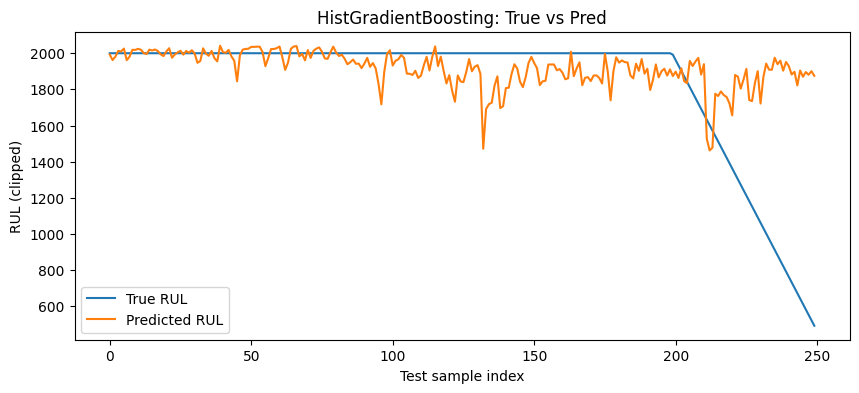

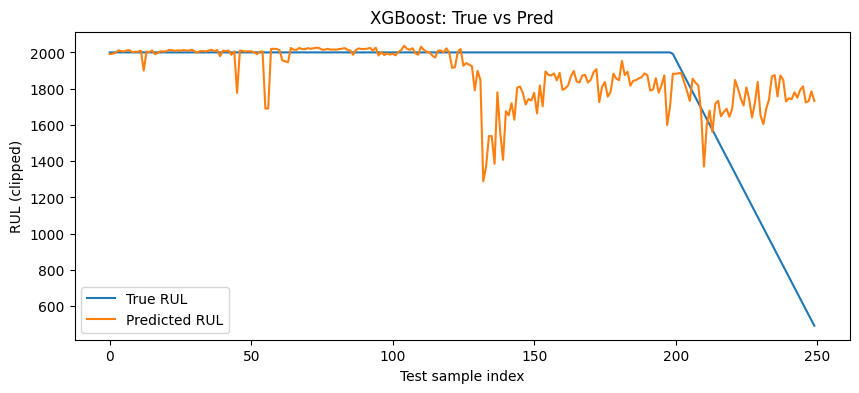

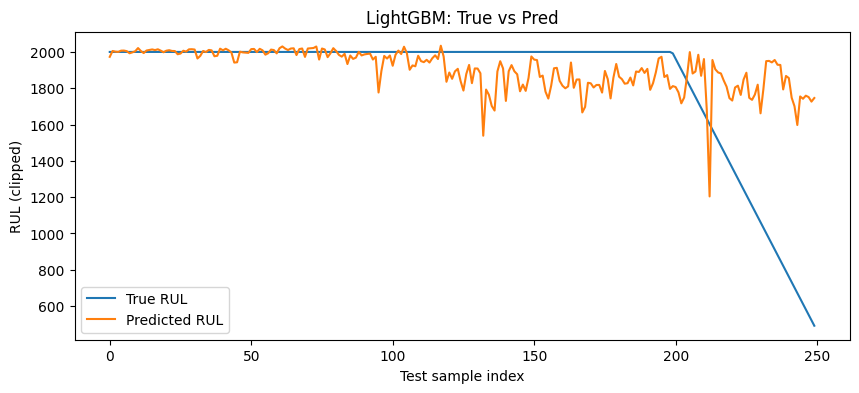

In [43]:
import matplotlib.pyplot as plt

def quick_plot(y_true, y_pred, title):
    n = min(250, len(y_true))
    plt.figure(figsize=(10,4))
    plt.plot(y_true[:n], label="True RUL")
    plt.plot(y_pred[:n], label="Predicted RUL")
    plt.title(title)
    plt.xlabel("Test sample index")
    plt.ylabel("RUL (clipped)")
    plt.legend()
    plt.show()

quick_plot(y_test, pred_hgb, "HistGradientBoosting: True vs Pred")
quick_plot(y_test, pred_xgb, "XGBoost: True vs Pred")
quick_plot(y_test, pred_lgb, "LightGBM: True vs Pred")


 
- #### HGB wins in MAE (lowest average error).
- #### LGB is close, with slightly better RMSE (less extreme errors).
- #### RF is behind both.
- #### XGB underperformed (likely poor hyperparameters).
- HistGradientBoosting (HGB) → MAE = 220.96, RMSE = 408.21 ( best overall so far)
- LightGBM (LGB) → MAE = 246.67, RMSE = 402.42 (lower RMSE, but worse MAE)
- Random Forest (RF) → MAE = 230.11, RMSE = 427.86 (worse than HGB in both)
- XGBoost (XGB) → MAE = 316.70, RMSE = 438.49 (worst so far)

## Simple tuning loop over max_iter
### This trains HGB with increasing number of trees (iterations) and logs metrics every time.

In [44]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

results = []

# choose a sensible sweep (you can adjust ranges)
iters_list = [200, 400, 600, 800, 1000, 1200, 1500]

for it in iters_list:
    hgb = HistGradientBoostingRegressor(
        max_iter=it,
        learning_rate=0.05,     # fixed for this first sweep
        max_depth=None,
        random_state=42
    )
    hgb.fit(X_train, y_train)

    y_pred = hgb.predict(X_test)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    print(f"[max_iter={it:4d}]  R2={r2:.4f} | MAE={mae:.2f} | RMSE={rmse:.2f}")

    results.append({"max_iter": it, "learning_rate": 0.05, "R2": r2, "MAE": mae, "RMSE": rmse})

results_df = pd.DataFrame(results)
results_df.sort_values("MAE").head()


[max_iter= 200]  R2=-0.1389 | MAE=226.97 | RMSE=409.91
[max_iter= 400]  R2=-0.1318 | MAE=221.70 | RMSE=408.63
[max_iter= 600]  R2=-0.1295 | MAE=220.96 | RMSE=408.21
[max_iter= 800]  R2=-0.1281 | MAE=220.68 | RMSE=407.96
[max_iter=1000]  R2=-0.1277 | MAE=220.71 | RMSE=407.88
[max_iter=1200]  R2=-0.1277 | MAE=220.74 | RMSE=407.88
[max_iter=1500]  R2=-0.1276 | MAE=220.81 | RMSE=407.87


,max_iter,learning_rate,R2,MAE,RMSE
3,800,0.05,-0.128098,220.676742,407.955939
4,1000,0.05,-0.127666,220.710872,407.877831
5,1200,0.05,-0.127700,220.741527,407.883926
6,1500,0.05,-0.127598,220.807834,407.865606
2,600,0.05,-0.129478,220.956934,408.205406


## 2D sweep: learning_rate × max_iter
### Lower learning rate often needs more iterations but gives smoother learning.

In [45]:
results = []
iters_list = [400, 800, 1200, 1600]
lr_list    = [0.03, 0.05, 0.08, 0.10]

for lr in lr_list:
    for it in iters_list:
        hgb = HistGradientBoostingRegressor(
            max_iter=it,
            learning_rate=lr,
            max_depth=None,
            random_state=42
        )
        hgb.fit(X_train, y_train)
        y_pred = hgb.predict(X_test)

        mae  = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2   = r2_score(y_test, y_pred)

        print(f"[lr={lr:.3f}, max_iter={it:4d}]  R2={r2:.4f} | MAE={mae:.2f} | RMSE={rmse:.2f}")
        results.append({"learning_rate": lr, "max_iter": it, "R2": r2, "MAE": mae, "RMSE": rmse})

grid_df = pd.DataFrame(results)
grid_df.sort_values(["MAE", "RMSE"]).head(10)


[lr=0.030, max_iter= 400]  R2=-0.1387 | MAE=244.01 | RMSE=409.87
[lr=0.030, max_iter= 800]  R2=-0.1326 | MAE=242.40 | RMSE=408.77
[lr=0.030, max_iter=1200]  R2=-0.1313 | MAE=242.46 | RMSE=408.54
[lr=0.030, max_iter=1600]  R2=-0.1304 | MAE=242.33 | RMSE=408.37
[lr=0.050, max_iter= 400]  R2=-0.1318 | MAE=221.70 | RMSE=408.63
[lr=0.050, max_iter= 800]  R2=-0.1281 | MAE=220.68 | RMSE=407.96
[lr=0.050, max_iter=1200]  R2=-0.1277 | MAE=220.74 | RMSE=407.88
[lr=0.050, max_iter=1600]  R2=-0.1276 | MAE=220.83 | RMSE=407.86
[lr=0.080, max_iter= 400]  R2=-0.1416 | MAE=206.86 | RMSE=410.40
[lr=0.080, max_iter= 800]  R2=-0.1407 | MAE=206.57 | RMSE=410.23
[lr=0.080, max_iter=1200]  R2=-0.1406 | MAE=206.60 | RMSE=410.20
[lr=0.080, max_iter=1600]  R2=-0.1406 | MAE=206.61 | RMSE=410.21
[lr=0.100, max_iter= 400]  R2=-0.2293 | MAE=251.71 | RMSE=425.87
[lr=0.100, max_iter= 800]  R2=-0.2293 | MAE=251.64 | RMSE=425.86
[lr=0.100, max_iter=1200]  R2=-0.2294 | MAE=251.67 | RMSE=425.88
[lr=0.100, max_iter=1600]

,learning_rate,max_iter,R2,MAE,RMSE
9,0.08,800,-0.140702,206.574365,410.228646
10,0.08,1200,-0.140552,206.595885,410.201610
11,0.08,1600,-0.140577,206.614154,410.206228
8,0.08,400,-0.141634,206.856674,410.396252
5,0.05,800,-0.128098,220.676742,407.955939
6,0.05,1200,-0.127700,220.741527,407.883926
7,0.05,1600,-0.127586,220.834050,407.863305
4,0.05,400,-0.131803,221.696881,408.625278
3,0.03,1600,-0.130415,242.328421,408.374677
1,0.03,800,-0.132617,242.401620,408.772282


#### visualization (MAE per learning rate) 

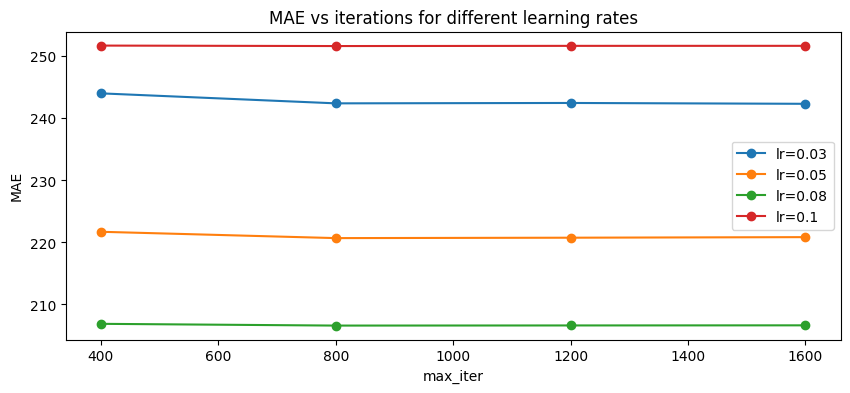

In [46]:
plt.figure(figsize=(10,4))
for lr in lr_list:
    d = grid_df[grid_df["learning_rate"] == lr].sort_values("max_iter")
    plt.plot(d["max_iter"], d["MAE"], marker="o", label=f"lr={lr}")
plt.ylabel("MAE")
plt.xlabel("max_iter")
plt.title("MAE vs iterations for different learning rates")
plt.legend()
plt.show()


### Further reduce MAE and Improving R2

### Add Regularization to Prevent overfitting & smooth predictions → improves generalization (R²).

In [47]:
from sklearn.ensemble import HistGradientBoostingRegressor

results = []
for leaf in [20, 50, 100, 200]:
    for l2 in [0.0, 0.1, 1.0]:
        hgb = HistGradientBoostingRegressor(
            max_iter=800,
            learning_rate=0.08,
            min_samples_leaf=leaf,
            l2_regularization=l2,
            random_state=42
        )
        hgb.fit(X_train, y_train)
        y_pred = hgb.predict(X_test)

        mae  = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2   = r2_score(y_test, y_pred)

        print(f"leaf={leaf:3d}, l2={l2:.1f} | R2={r2:.4f} | MAE={mae:.2f} | RMSE={rmse:.2f}")
        results.append({"leaf": leaf, "l2": l2, "R2": r2, "MAE": mae, "RMSE": rmse})

results_df = pd.DataFrame(results)
results_df.sort_values("MAE").head()


leaf= 20, l2=0.0 | R2=-0.1407 | MAE=206.57 | RMSE=410.23
leaf= 20, l2=0.1 | R2=-0.0963 | MAE=238.74 | RMSE=402.17
leaf= 20, l2=1.0 | R2=-0.1143 | MAE=235.33 | RMSE=405.45
leaf= 50, l2=0.0 | R2=-0.5063 | MAE=327.52 | RMSE=471.41
leaf= 50, l2=0.1 | R2=-0.3540 | MAE=285.77 | RMSE=446.94
leaf= 50, l2=1.0 | R2=-0.5821 | MAE=359.33 | RMSE=483.12
leaf=100, l2=0.0 | R2=-1.1615 | MAE=468.74 | RMSE=564.70
leaf=100, l2=0.1 | R2=-1.0196 | MAE=461.83 | RMSE=545.85
leaf=100, l2=1.0 | R2=-0.8826 | MAE=437.22 | RMSE=527.01
leaf=200, l2=0.0 | R2=-0.5366 | MAE=369.77 | RMSE=476.12
leaf=200, l2=0.1 | R2=-0.5408 | MAE=358.08 | RMSE=476.78
leaf=200, l2=1.0 | R2=-0.5644 | MAE=376.36 | RMSE=480.41


,leaf,l2,R2,MAE,RMSE
0,20,0.0,-0.140702,206.574365,410.228646
2,20,1.0,-0.114284,235.325463,405.450480
1,20,0.1,-0.096317,238.738890,402.168421
4,50,0.1,-0.353990,285.769663,446.938337
3,50,0.0,-0.506309,327.520863,471.407922


### here R² is still negative. That tells us regularization alone isn’t solving the variance problem.

## Smarter Features (find best sensors)
#### Why?
- Dataset has many sensors but not all of them help predict failure.
- Some may just add noise, which hurts R² (variance explained).
- If we find the top 20–30 features and train only with them, MAE usually drops and R² improves.

### Smarter window and best learning rate, max_iter with step 30. eliminate noise sensors. and consider top 30 features.

- it rebuilds features for any WINDOW
- does a time-aware split using window end indices
- trains HGB on all features and then on Top-30 features found via permutation importance
- prints R² (as accuracy %), MAE, RMSE, and Error% each time
- shows a small leaderboard

WIN=30, All feats            | R²=-0.0456 ( -4.56%) | MAE=  211.71 | RMSE=  392.75 | Error%= 11.27%


/Users/priyankrupera/Documents/ML_Project/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


WIN=30, Top30                | R²=-0.1377 (-13.77%) | MAE=  211.54 | RMSE=  409.69 | Error%= 11.26%
WIN=60, All feats            | R²=-0.1407 (-14.07%) | MAE=  206.57 | RMSE=  410.23 | Error%= 10.99%
WIN=60, Top30                | R²=-0.5834 (-58.34%) | MAE=  320.52 | RMSE=  483.32 | Error%= 17.06%
WIN=120, All feats           | R²=-0.1751 (-17.51%) | MAE=  220.80 | RMSE=  416.54 | Error%= 11.75%
WIN=120, Top30               | R²=-0.2692 (-26.92%) | MAE=  242.59 | RMSE=  432.89 | Error%= 12.91%


,label,R2,Accuracy%,MAE,RMSE,Error%
2,"WIN=60, All feats",-0.140702,-14.070198,206.574365,410.228646,10.994684
1,"WIN=30, Top30",-0.137709,-13.770930,211.544347,409.690165,11.259205
0,"WIN=30, All feats",-0.045569,-4.556851,211.709230,392.749945,11.267981
4,"WIN=120, All feats",-0.175137,-17.513711,220.803137,416.543530,11.752677
5,"WIN=120, Top30",-0.269207,-26.920748,242.593228,432.894865,12.912497
3,"WIN=60, Top30",-0.583395,-58.339480,320.520571,483.319695,17.059340


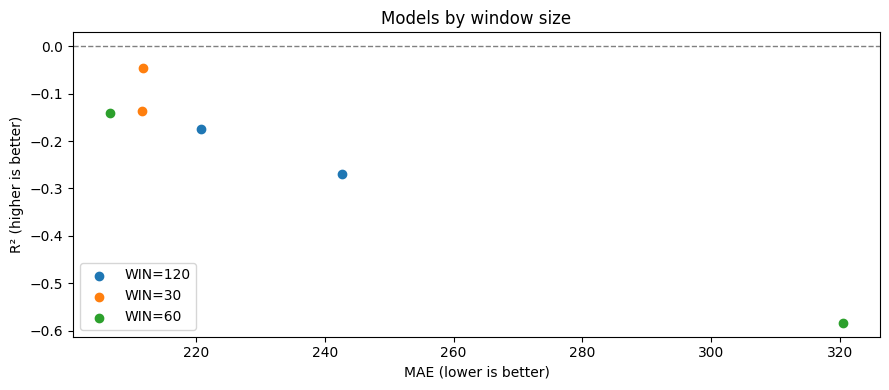

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# ----------------------------
# 0) CONFIG
# ----------------------------
WINDOWS_TO_TRY = [30, 60, 120]
STEP = 30
LEARNING_RATE = 0.08
MAX_ITER = 800
TARGET_COL = "RUL_clipped"         # change to "RUL_clipped" if you prefer the clipped target
TOPK = 30                  # how many top features to keep in the "TopK" run

# ----------------------------
# 1) HELPERS
# ----------------------------
def build_window_features(arr: np.ndarray) -> np.ndarray:
    """
    arr: (W, S) window of sensor values; W = WINDOW, S = # sensors
    returns: 1D vector of concatenated per-sensor stats:
             mean, std, min, max, last, delta_last, slope, iqr, ema_last
    """
    W = arr.shape[0]
    # basic stats
    mean_ = np.mean(arr, axis=0)
    std_  = np.std(arr, axis=0, ddof=0)
    min_  = np.min(arr, axis=0)
    max_  = np.max(arr, axis=0)
    last_ = arr[-1, :]
    first_ = arr[0, :]
    delta_last = last_ - first_

    # slope via least-squares
    x = np.arange(W)
    x_mean = x.mean()
    denom = np.sum((x - x_mean) ** 2) if W > 1 else 1.0
    y_centered = arr - arr.mean(axis=0, keepdims=True)
    slope_ = (y_centered * (x - x_mean)[:, None]).sum(axis=0) / denom

    # iqr
    q75 = np.percentile(arr, 75, axis=0)
    q25 = np.percentile(arr, 25, axis=0)
    iqr_ = q75 - q25

    # simple EMA across time (emphasizes recent values)
    alpha = 2 / (min(W, 20) + 1)
    ema = np.copy(arr[0, :])
    for t in range(1, W):
        ema = alpha * arr[t, :] + (1 - alpha) * ema
    ema_last = ema

    return np.concatenate([mean_, std_, min_, max_, last_, delta_last, slope_, iqr_, ema_last], axis=0)

def make_features_with_window(df: pd.DataFrame, window: int, step: int):
    """
    Build features for a given WINDOW/STEP.
    Returns:
      X_df (DataFrame of features),
      y (Series of targets),
      end_idx (np.array of window end row indices),
      feature_names (list[str])
    """
    # choose numeric sensor columns named sensor_*
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    sensor_cols = [c for c in df.columns if c.startswith("sensor_") and c in num_cols]
    if len(sensor_cols) == 0:
        raise ValueError("No sensor_* numeric columns found.")

    # only build windows where TARGET exists (before last failure)
    valid_mask = np.isfinite(df[TARGET_COL].values)
    last_labelable = np.where(valid_mask)[0][-1]

    rows = []
    labels = []
    ends = []

    # build per-window feature rows
    for start in range(0, last_labelable - window + 1, step):
        end = start + window
        arr = df.loc[start:end-1, sensor_cols].values.astype("float32", copy=False)
        feats = build_window_features(arr)
        label = float(df.loc[end-1, TARGET_COL])

        rows.append(feats)
        labels.append(label)
        ends.append(end - 1)

    # build column names: stats x sensors in same order as in build_window_features
    stat_names = ["mean","std","min","max","last","delta_last","slope","iqr","ema_last"]
    feature_names = [f"{s}_{stat}" for stat in stat_names for s in sensor_cols]

    X = np.vstack(rows).astype("float32")
    y = np.asarray(labels, dtype="float32")
    end_idx = np.asarray(ends, dtype="int32")

    # DataFrame so we can select by column names later
    X_df = pd.DataFrame(X, columns=feature_names)
    return X_df, y, end_idx, feature_names

def time_split(X_df: pd.DataFrame, y: np.ndarray, end_idx: np.ndarray, q: float = 0.8):
    """
    Time-aware split using the quantile of window end indices.
    """
    split_point = int(np.quantile(end_idx, q))
    train_mask = end_idx < split_point
    test_mask  = ~train_mask

    X_train = X_df.iloc[train_mask].reset_index(drop=True)
    y_train = y[train_mask]
    X_test  = X_df.iloc[test_mask].reset_index(drop=True)
    y_test  = y[test_mask]

    if len(X_train) == 0 or len(X_test) == 0:
        raise ValueError("Split produced empty train/test. Try a different quantile or rebuild windows.")
    return X_train, y_train, X_test, y_test

def evaluate_model(model, X_train, y_train, X_test, y_test, label=""):
    """
    Fit, predict, and print metrics including Accuracy% (R²*100) and Error% (MAE/mean(y_test)*100).
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    acc_pct = r2 * 100.0

    mean_rul = float(np.mean(y_test))
    err_pct = (mae / mean_rul) * 100.0 if mean_rul > 0 else np.nan

    print(f"{label:28s} | R²={r2:.4f} ({acc_pct:6.2f}%) | MAE={mae:8.2f} | RMSE={rmse:8.2f} | Error%={err_pct:6.2f}%")
    return {"label": label, "R2": r2, "Accuracy%": acc_pct, "MAE": mae, "RMSE": rmse, "Error%": err_pct}

# ----------------------------
# 2) EXPERIMENT LOOP
# ----------------------------
all_results = []
best_row = None

for WIN in WINDOWS_TO_TRY:
    # A) regenerate features for this WINDOW
    X_all, y_all, end_idx, feature_names = make_features_with_window(df, window=WIN, step=STEP)
    X_train, y_train, X_test, y_test = time_split(X_all, y_all, end_idx, q=0.8)

    # B) baseline on all features
    hgb_all = HistGradientBoostingRegressor(
        max_iter=MAX_ITER,
        learning_rate=LEARNING_RATE,
        random_state=42
    )
    res_all = evaluate_model(hgb_all, X_train, y_train, X_test, y_test, label=f"WIN={WIN}, All feats")
    all_results.append(res_all)

    # C) permutation importance to pick TopK
    hgb_all.fit(X_train, y_train)
    pi = permutation_importance(hgb_all, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)
    importances = pi.importances_mean
    idx_sorted = np.argsort(importances)[::-1]
    top_cols = list(X_all.columns[idx_sorted[:TOPK]])

    # D) retrain with TopK only
    X_train_top = X_train[top_cols]
    X_test_top  = X_test[top_cols]

    hgb_top = HistGradientBoostingRegressor(
        max_iter=MAX_ITER,
        learning_rate=LEARNING_RATE,
        random_state=42
    )
    res_top = evaluate_model(hgb_top, X_train_top, y_train, X_test_top, y_test, label=f"WIN={WIN}, Top{TOPK}")
    all_results.append(res_top)

# ----------------------------
# 3) LEADERBOARD
# ----------------------------
results_df = pd.DataFrame(all_results)
display(results_df.sort_values(["MAE","RMSE"]).head(10))

# Optional plots
plt.figure(figsize=(9,4))
for key, grp in results_df.groupby(results_df["label"].str.extract(r'WIN=(\d+)')[0]):
    plt.scatter(grp["MAE"], grp["R2"], label=f"WIN={key}")
plt.axhline(0.0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("MAE (lower is better)")
plt.ylabel("R² (higher is better)")
plt.title("Models by window size")
plt.legend()
plt.tight_layout()
plt.show()
